In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
city_ride_data = pd.merge(city_data, ride_data, on="city")

# Display the data table for preview
city_ride_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types

#Urban City Information:
urban = city_ride_data.loc[(city_ride_data["type"] == "Urban")]
avg_city_urban = urban.groupby(['city']).mean()['fare']
total_ride_urban = urban.groupby(['city']).count()['ride_id']
total_driver_urban = urban.groupby(['city'])['driver_count'].mean()

#Suburban City Information:
suburban = city_ride_data.loc[(city_ride_data["type"] == "Suburban")]
avg_city_suburban = suburban.groupby(['city']).mean()['fare']
total_ride_suburban = suburban.groupby(['city']).count()['ride_id']
total_driver_suburban = suburban.groupby(['city'])['driver_count'].mean()

#Rural City Information:
rural = city_ride_data.loc[(city_ride_data["type"] == "Rural")]
avg_city_rural = rural.groupby(['city']).mean()['fare']
total_ride_rural = rural.groupby(['city']).count()['ride_id']
total_driver_rural = rural.groupby(['city'])['driver_count'].mean()


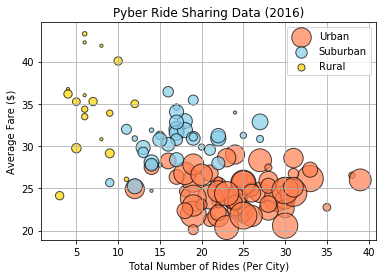

In [47]:
# Build the scatter plots for each city types

#Urban
plt.scatter(total_ride_urban, avg_city_urban,s=total_driver_urban*10,
            marker ='o', facecolors ="coral", edgecolors='black',alpha = 0.7, label="Urban")
#Surburban
plt.scatter(total_ride_suburban, avg_city_suburban,s=total_driver_suburban*10,
            marker ='o', facecolors ="skyblue", edgecolors='black',alpha = 0.7, label="Suburban")
#Rural
plt.scatter(total_ride_rural, avg_city_rural,s=total_driver_rural*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.7, label="Rural")

plt.legend(loc='upper right')
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid(True)

## Total Fares by City Type

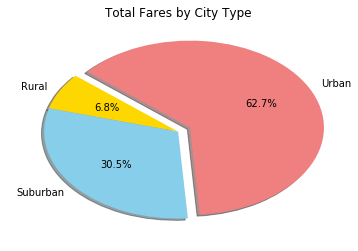

In [48]:
# Calculate Type Percents
fares = city_ride_data.groupby('type')['fare'].sum()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "skyblue", "lightcoral"]
explode = [0, 0, .1]
plt.pie(fares, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Total Fares by City Type")

# Save Figure
plt.savefig("graphs/Total Fares by City Type.png")
plt.show()

## Total Rides by City Type

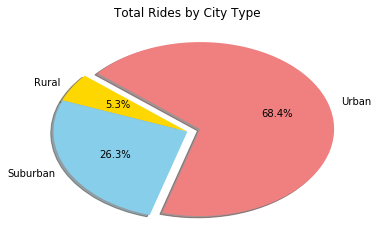

In [20]:
#Calculate Type Percents
rides = city_ride_data.groupby('type')['ride_id'].count()

#Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["Gold", "skyblue", "lightcoral"]
explode = [0, 0, .1]
plt.pie(rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Total Rides by City Type")

#Save Figure
plt.savefig("graphs/Total Rides by City Type.png")
plt.show()


## Total Drivers by City Type

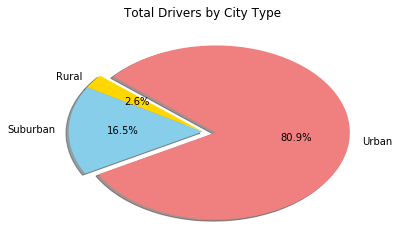

In [49]:
#Calculate Pie Chart
drivers = city_data.groupby('type')['driver_count'].sum()

#Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["Gold", "skyblue", "lightcoral"]
explode = [0, 0, .1]
plt.pie(drivers, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Total Drivers by City Type")

#Save Figure
plt.savefig("graphs/Total Drivers by City Type.png")
plt.show()